# Prediction of Hospital Readmission Rates through HbA1c test:
* Influence of HbA1c on readmission rates among hospitalized patients with diabetes.

## Introduction / Use Case:
* HbA1c (Hemoglobin A1c) is a key indicator of long-term blood sugar control. 
* Despite its clinical significance, HbA1c testing was performed in only 18.4% of hospital encounters in the dataset. 
* The study uses logistic regression to analyze whether measuring HbA1c during hospitalization affects readmission likelihood, while controlling for demographic factors, disease severity, hospital stay duration, and primary diagnosis.

## About Data:
* Data consists of 71515 patients data with 101763 diabetes encounters
* There are 47 attributes 
* Hospital readmission - Target variable, defined as a patient being admitted again within or after 30 days of discharge


In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# set default params if any
pd.set_option('display.float_format', '{:.7f}'.format)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# read the hospital dataset
df = pd.read_csv("hospitaldata.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Unknown,_Other,Referral,1,Other,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),Unknown,Home,Emergency,3,Other,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Yes,Yes,After30Days
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown,Home,Emergency,2,Other,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,[30-40),Unknown,Home,Emergency,2,Other,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Yes,Yes,No
4,16680,42519267,Caucasian,Male,[40-50),Unknown,Home,Emergency,1,Other,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Yes,Yes,No


# Data Preprocessing

In [4]:
# Check the shape and initial info of the data
print(f"Shape of the dataset: {df.shape}\n\n")


Shape of the dataset: (101763, 47)




In [5]:
print(f"Initial information of the dataset: \n")
df.info()

Initial information of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101763 non-null  int64 
 1   patient_nbr               101763 non-null  int64 
 2   race                      101763 non-null  object
 3   gender                    101763 non-null  object
 4   age                       101763 non-null  object
 5   weight                    101763 non-null  object
 6   discharge_disposition_id  101763 non-null  object
 7   admission_source_id       101763 non-null  object
 8   time_in_hospital          101763 non-null  int64 
 9   medical_specialty         101763 non-null  object
 10  num_lab_procedures        101763 non-null  int64 
 11  num_procedures            101763 non-null  int64 
 12  num_medications           101763 non-null  int64 
 13  number_outpatient    

In [6]:
print(f"No. of patients: {df['patient_nbr'].nunique()}")
print(f"No. of encounters: {df['encounter_id'].nunique()}")

No. of patients: 71515
No. of encounters: 101763


In [7]:
df[df.isnull().any(axis=1)]

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted


In [8]:
df[df.duplicated()]

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted


Inference:
* Dataset comprises of 101763 records and 47 attributes
* Dataset doesn't consists of any null values and duplicate records, but looks like the nulls have been replaced by "unknown" values, will further analyse in next steps
* There are 71515 unique patients data with 101763 diabetes encounters data

In [9]:
# Validation of target variable
df['readmitted'].value_counts()

readmitted
No              54861
After30Days     35545
Within30Days    11357
Name: count, dtype: int64

# Target Variable - Readmission is categorized as:
* "Readmitted" (1) - If the patient was admitted to the hospital again within 30 days or after 30 days of the discharge.
* "Not readmitted" (0) - If the patient was either not admitted again

In [10]:
df['readmitted'].value_counts()

readmitted
No              54861
After30Days     35545
Within30Days    11357
Name: count, dtype: int64

In [11]:
# Converting target variable into numerical variable
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x=="No" else 1)
df['readmitted'].value_counts()

readmitted
0    54861
1    46902
Name: count, dtype: int64

In [12]:
print(f"Readmitted diabetes encounters are relatively balanced by {(sum(df['readmitted'])/len(df['readmitted'].index))*100}")

Readmitted diabetes encounters are relatively balanced by 46.089443117832616


# Exploratory Data Analysis
 ## Analysis of string variables

In [13]:
# Check for string attributes
df_str = df.select_dtypes(include=['object'])
df_str.head()


,race,gender,age,weight,discharge_disposition_id,admission_source_id,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),Unknown,_Other,Referral,Other,250.83,?,?,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),Unknown,Home,Emergency,Other,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Yes,Yes
2,AfricanAmerican,Female,[20-30),Unknown,Home,Emergency,Other,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),Unknown,Home,Emergency,Other,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Yes,Yes
4,Caucasian,Male,[40-50),Unknown,Home,Emergency,Other,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Yes,Yes


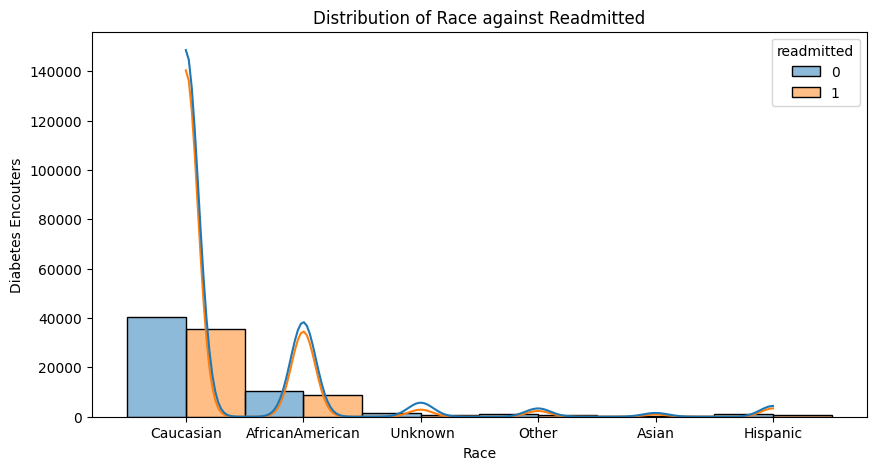

In [14]:
# df_str.groupby("race").count()['gender'].plot(kind="bar")

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='race', kde=True, hue="readmitted", multiple="dodge")
plt.xlabel("Race")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of Race against Readmitted")
plt.show()

Inference:
* Individuals of Caucasian have the highest number of diabetes-related encounters, followed by African Americans compared to other racial groups.  
* However, the hospital readmission rates for individual two groups are nearly equal, with only a slight difference.

Conclusion:
* The race variable may be a significant predictor, as individuals of Asian, African, and American tend to have a higher frequency of diabetes-related encounters compared to other groups.

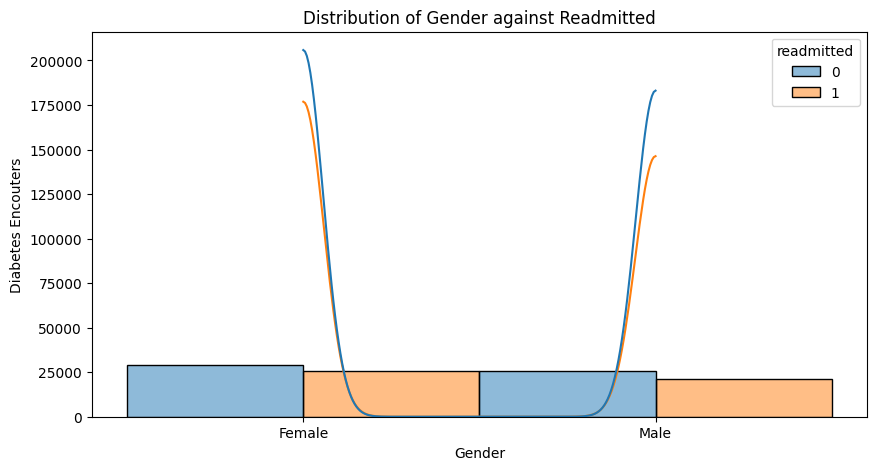

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='gender', kde=True, hue="readmitted", multiple="dodge")
plt.xlabel("Gender")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of Gender against Readmitted")
plt.show()

Inference:
* The number of diabetes-related encounters is nearly equal between female and male patients.  
* Additionally, the readmission rates for both genders appear to be similar.  

Conclusion: 
* The gender variable does not exhibit significant variation concerning diabetes encounters.

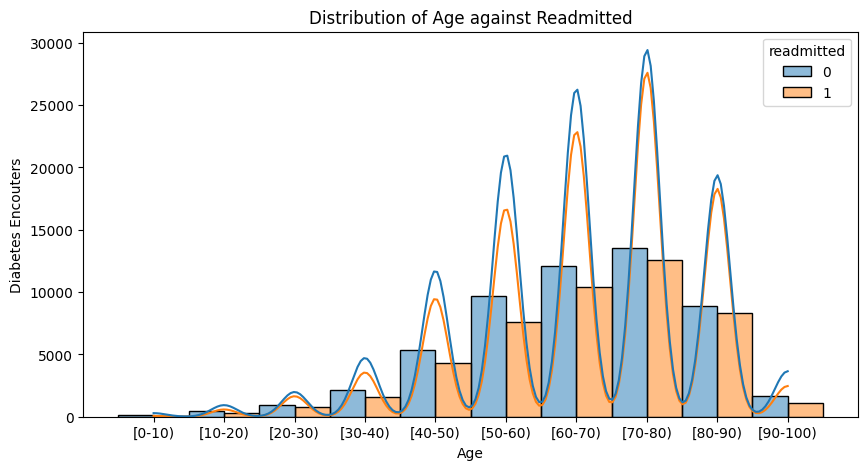

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', kde=True, hue="readmitted", multiple="dodge")
plt.xlabel("Age")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of Age against Readmitted")
plt.show()

Inference:
* Patients below the age of 40 have comparitively less recorded diabetes encounters.  
* In contrast, diabetes encounters increase in a normal distribution for individuals aged 40 to 90.  
* The highest number of diabetes encounters is observed in the 70–80 age group.  
* Additionally, hospital readmission rates are significantly high for individuals aged 40–90.  

Conclusion:
* Since diabetes encounters are notably high within the 40–90 age range, the age variable is a significant predictor.

In [17]:
df['weight'].value_counts()

weight
 Unknown     98566
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

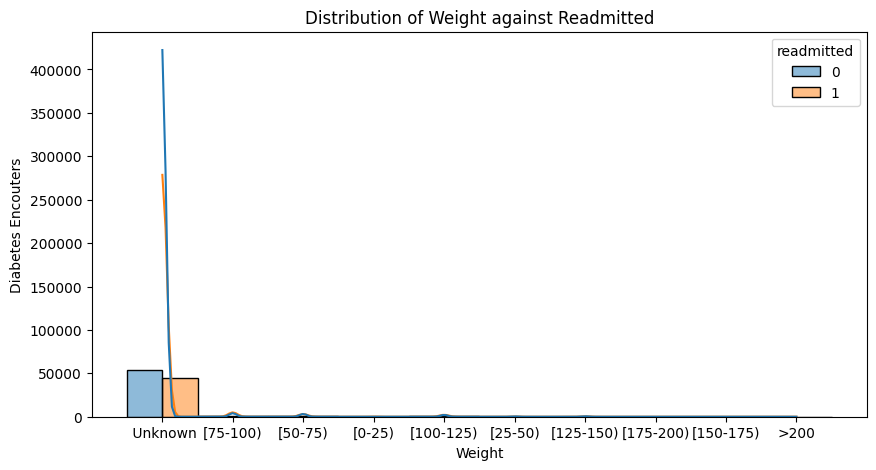

In [18]:
# df.groupby(["weight","readmitted"]).count()['encounter_id']

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='weight', kde=True, hue="readmitted", multiple="dodge")
plt.xlabel("Weight")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of Weight against Readmitted")
plt.show()

Inference:
* The number of patients with recorded weights during the hospital admission is relatively low.
* A majority of patients do not have their weight recorded in the dataset.

Conclusion:
* Since most weights fall under the "Unknown" category, the weight variable may not be a significant predictor.

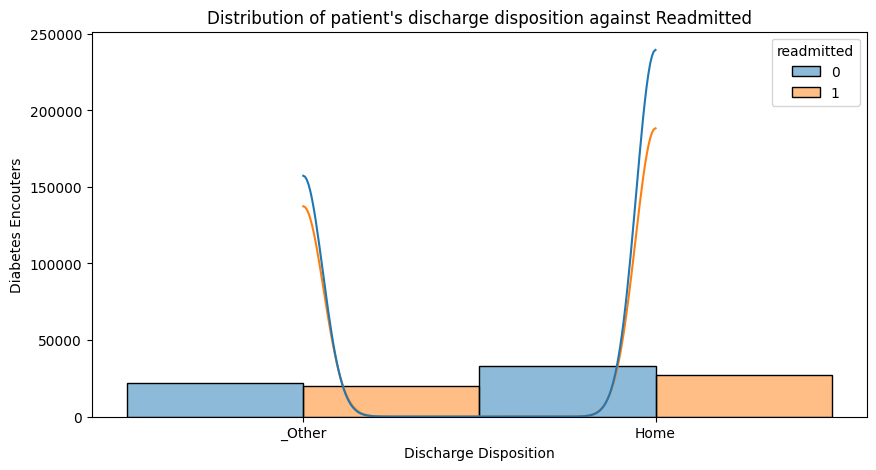

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x="discharge_disposition_id", kde="True", hue="readmitted", multiple = "dodge")
plt.xlabel("Discharge Disposition")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of patient's discharge disposition against Readmitted")
plt.show()

Inference:
* Patients discharged from the hospital to home exhibit a higher readmission rate.

Conclusion:
* Since home-discharge patients show a strong association with the target variable, this factor may be a significant predictor.

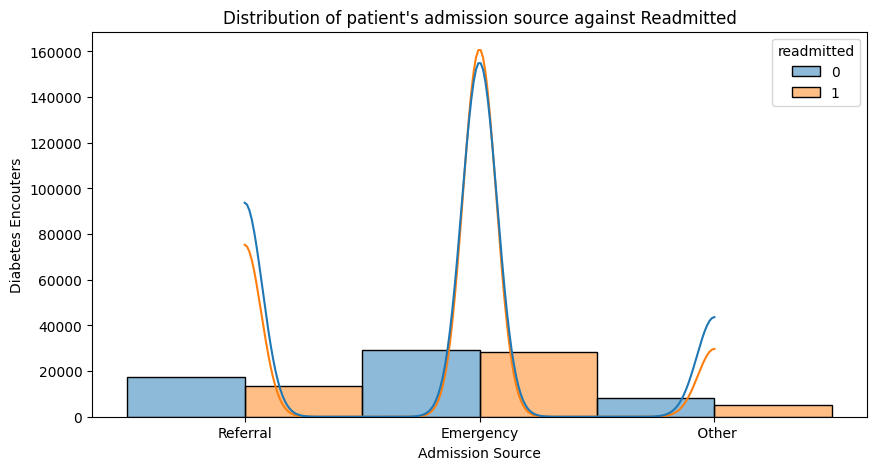

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="admission_source_id", kde="True", hue="readmitted", multiple="dodge")
plt.xlabel("Admission Source")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of patient's admission source against Readmitted")
plt.show()

Inference:
* A higher number of diabetes encounters are observed among patients arriving at the hospital through emergency admissions.  
* Additionally, these emergency arrival patients exhibit a higher readmission rate.  

Conclusion:
* Since emergency arrivals show a strong association with the target variable, this factor may be a significant predictor.

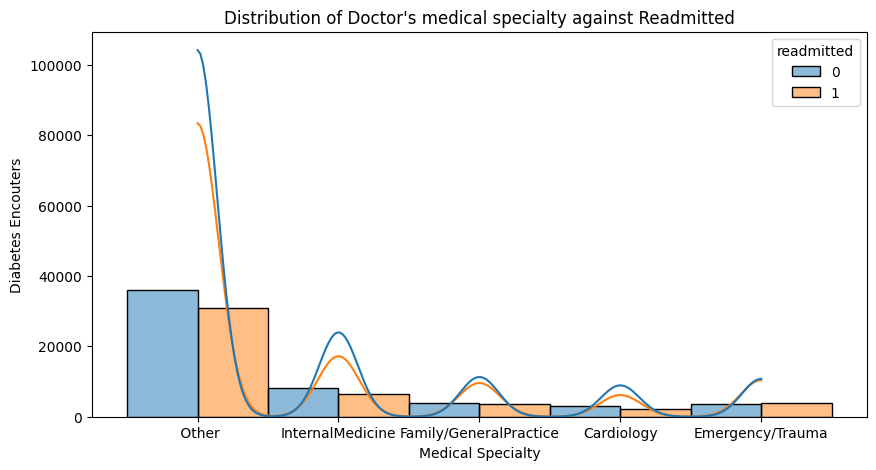

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="medical_specialty", kde="True", hue="readmitted", multiple="dodge")
plt.xlabel("Medical Specialty")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of Doctor's medical specialty against Readmitted")
plt.show()

Inference:
* The number of patients with recorded medical specialty of doctor's during the hospital admission is relatively low.
* A majority of patients do not have their diagnoised doctor's medical specialty recorded in the dataset.

Conclusion:
* Since most medical specialty fall under the "Unknown" category, the variable may not be a significant predictor.

In [22]:
# Function to check which columns contain special characters
def find_columns_with_special_chars(df, columns):
    pattern = r'[^a-zA-Z0-9\s]'
    cols_with_special_chars = [col for col in columns if df[col].astype(str).apply(lambda x: bool(re.search(pattern, x))).any()]
    return cols_with_special_chars

# Checking special characters in specified columns
columns_to_check = df.columns
special_char_columns = find_columns_with_special_chars(df, columns_to_check)

print("Columns containing special characters:", special_char_columns)

Columns containing special characters: ['age', 'weight', 'discharge_disposition_id', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']


Inference:
* Columns 'diag_1', 'diag_2', 'diag_3' contain special character values.
* Ignoring these columns 'age', 'weight', 'discharge_disposition_id', 'medical_specialty', 'max_glu_serum', 'A1Cresult' as they have legit [],(),>,< characters for distinguishing the upper and lower limit of values.

Conclusion:
* 'diag_1', 'diag_2', 'diag_3' columns are to be fixed

In [23]:
df[['diag_1', 'diag_2', 'diag_3']].head()

,diag_1,diag_2,diag_3
0,250.83,?,?
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250


In [24]:
# Filter DataFrame for rows where the column contains special characters
def fetch_data_of_special_characs(col, df):
    pattern = r'[^a-zA-Z0-9\s]'
    return df[df[col].str.contains(pattern, regex=True, na=False)]

In [25]:
diag_1_df = fetch_data_of_special_characs('diag_1', df)
diag_1_df.head()['diag_1']

0     250.83
10     250.7
52     250.6
56     250.7
60     250.4
Name: diag_1, dtype: object

In [26]:
diag_2_df = fetch_data_of_special_characs('diag_2', df)
diag_2_df.head()['diag_2']

0          ?
1     250.01
3     250.43
12    250.43
28    250.02
Name: diag_2, dtype: object

In [27]:
df[df['diag_2'] == '?']['diag_2'].value_counts()

diag_2
?    358
Name: count, dtype: int64

In [28]:
diag_3_df = fetch_data_of_special_characs('diag_3', df)
diag_3_df.head()['diag_3']

0          ?
12     250.6
27    250.01
30    250.42
32    250.01
Name: diag_3, dtype: object

In [29]:
df[df['diag_3'] == '?']['diag_3'].value_counts()

diag_3
?    1423
Name: count, dtype: int64

Inference:
* The diag_1 attribute contains no special characters, except for ".", which is used to represent float values.
* The diag_2 and diag_3 attributes contain the "?" special character in 358 and 1,423 diabetes records, respectively.

Conclusion:
* No modifications are required for the diag_1 attribute. However, diag_2 and diag_3 need to be addressed as they contain 358 and 1,423 affected records, respectively.
* One possible correction is replacing "?" with the most frequently occurring value in diag_2 and diag_3.
* However, since diagnosis codes provide critical patient information, assigning the most frequent value to "?" may lead to incorrect predictions.
* Given that the affected records are relatively low in number, a better approach may be to remove these records from the dataset to maintain data integrity.

In [30]:
# Remove the "?" records from the dataset
df = df[~((df['diag_2'] == '?') | (df['diag_3'] == '?'))]
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),Unknown,Home,Emergency,3,Other,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Yes,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown,Home,Emergency,2,Other,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),Unknown,Home,Emergency,2,Other,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),Unknown,Home,Emergency,1,Other,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Yes,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),Unknown,Home,Referral,3,Other,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100261 entries, 1 to 101762
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100261 non-null  int64 
 1   patient_nbr               100261 non-null  int64 
 2   race                      100261 non-null  object
 3   gender                    100261 non-null  object
 4   age                       100261 non-null  object
 5   weight                    100261 non-null  object
 6   discharge_disposition_id  100261 non-null  object
 7   admission_source_id       100261 non-null  object
 8   time_in_hospital          100261 non-null  int64 
 9   medical_specialty         100261 non-null  object
 10  num_lab_procedures        100261 non-null  int64 
 11  num_procedures            100261 non-null  int64 
 12  num_medications           100261 non-null  int64 
 13  number_outpatient         100261 non-null  int64 
 14  number_em

Inference & Conclusion:
* After the removing "?" characters records from diag_2, diag_3 columns of df dataframe, there are 100261 entries

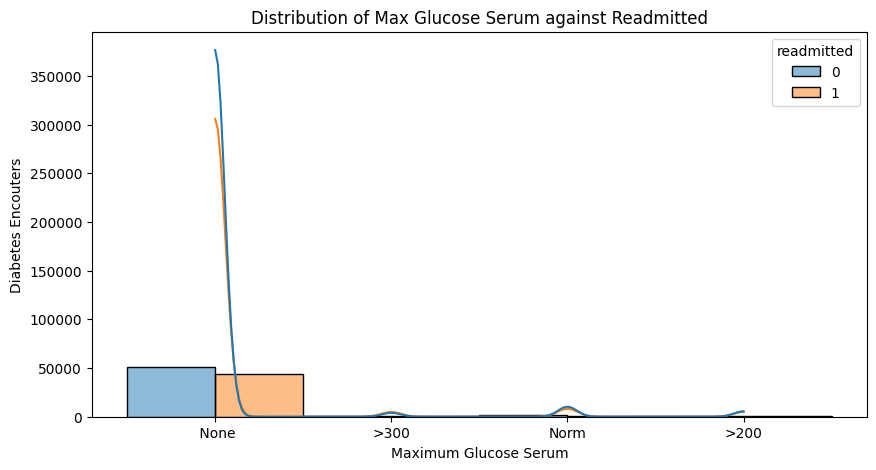

In [32]:
# max_glu_serum
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="max_glu_serum", kde="True", hue="readmitted", multiple="dodge")
plt.xlabel("Maximum Glucose Serum")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of Max Glucose Serum against Readmitted")
plt.show()

In [33]:
df['max_glu_serum'].value_counts()

max_glu_serum
 None    94997
Norm      2559
>200      1467
>300      1238
Name: count, dtype: int64

Inference:
* ">90%" of the values in the Maximum Glucose Serum attribute are recorded as "None".

Conclusion:
* Since a significant portion (> 90%) of the Maximum Glucose Serum values are "None", this variable may be considered insignificant for analysis.

In [34]:
df['A1Cresult'].value_counts()

A1Cresult
 None    83659
>8        7879
Norm      4936
>7        3787
Name: count, dtype: int64

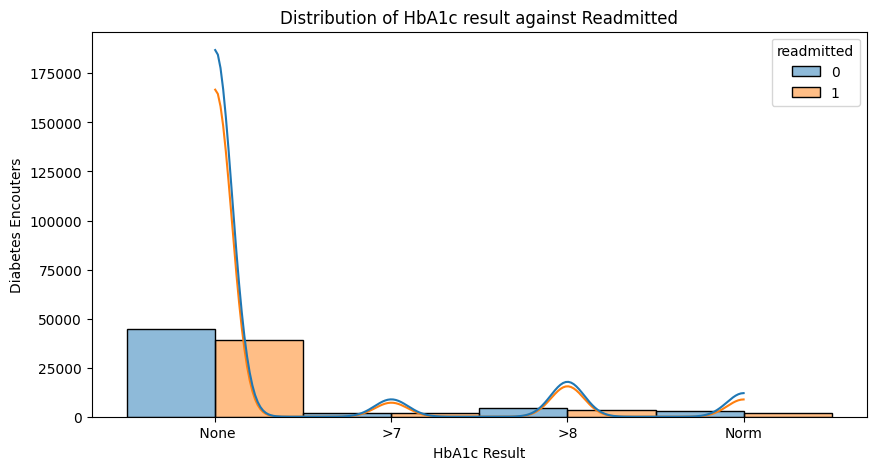

In [35]:
# A1Cresult
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="A1Cresult", kde="True", hue="readmitted", multiple="dodge")
plt.xlabel("HbA1c Result")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of HbA1c result against Readmitted")
plt.show()

Inference:
* ">80%" of the values in the HbA1c attribute are recorded as "None".

Conclusion:
* Since a significant portion (> 80%) of the HbA1c values are "None", this variable may be considered insignificant for analysis.

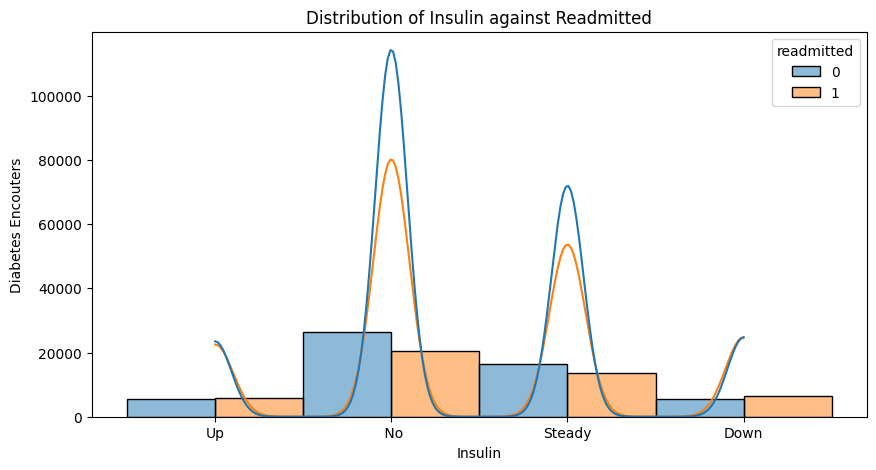

In [36]:
# Insulin variable:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="insulin", kde="True", hue="readmitted", multiple="dodge")
plt.xlabel("Insulin")
plt.ylabel("Diabetes Encouters")
plt.title("Distribution of Insulin against Readmitted")
plt.show()

Inference:
* Patients with No diabetes have the highest number of diabetes-related hospital encounters, which is expected, followed by Steady diabetic patients.
* This scenario likely represents first-time diabetic patients being diagnosed and treated.

Conclusion:
* Since the Insulin variable shows significant variation in predicting the target variable, it can be considered a significant predictor.

# Analysis on Numeric variables

In [37]:
# Check for integer attributes
df_int = df.select_dtypes(include=['int'])
df_int.head()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1,149190,55629189,3,59,0,18,0,0,0,9,1
2,64410,86047875,2,11,5,13,2,0,1,6,0
3,500364,82442376,2,44,1,16,0,0,0,7,0
4,16680,42519267,1,51,0,8,0,0,0,5,0
5,35754,82637451,3,31,6,16,0,0,0,9,1


In [38]:
df_int.drop(columns=['encounter_id','patient_nbr'], inplace=True)

In [39]:
df_int.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1,3,59,0,18,0,0,0,9,1
2,2,11,5,13,2,0,1,6,0
3,2,44,1,16,0,0,0,7,0
4,1,51,0,8,0,0,0,5,0
5,3,31,6,16,0,0,0,9,1


In [40]:
# Check for float attributes
df.select_dtypes(include=['float']).head()

""
1
2
3
4
5


Inference:
* There are no float attributes.
* There are 8 numerical attributes.

Conclusion:
* Check the distribution of these variables against target variable using box plot.
* Identify for outliers in each variable and if any, remove the records accordingly.
* Draw a heatmap correlation to understand the correlation between all these numerical variables against target variable readmitted.

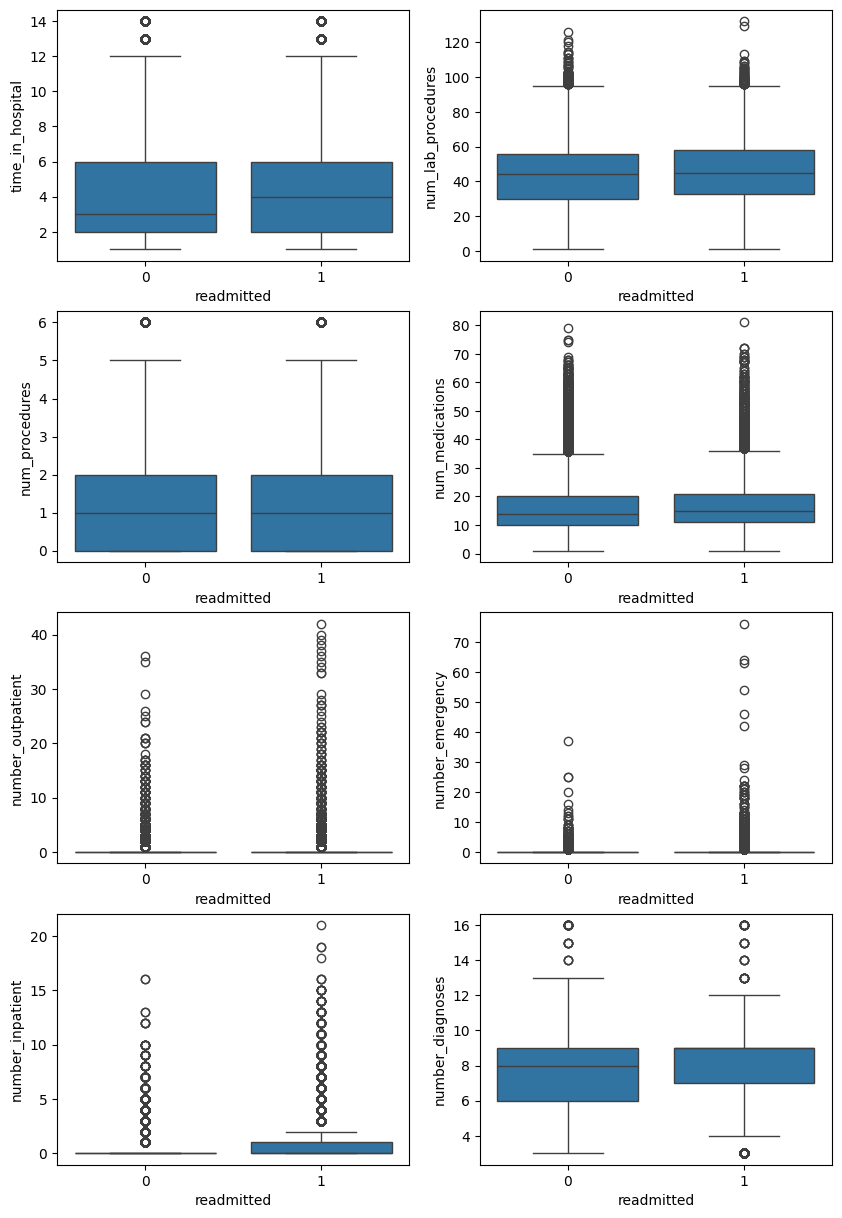

In [41]:
# Distribution of numerical variables against target variable
plt.figure(figsize=(10,15))

plt.subplot(4,2,1)
sns.boxplot(data=df_int, y='time_in_hospital', x='readmitted')
plt.subplot(4,2,2)
sns.boxplot(data=df_int, y='num_lab_procedures', x='readmitted')

plt.subplot(4,2,3)
sns.boxplot(data=df_int, y='num_procedures', x='readmitted')
plt.subplot(4,2,4)
sns.boxplot(data=df_int, y='num_medications', x='readmitted')

plt.subplot(4,2,5)
sns.boxplot(data=df_int, y='number_outpatient', x='readmitted')
plt.subplot(4,2,6)
sns.boxplot(data=df_int, y='number_emergency', x='readmitted')

plt.subplot(4,2,7)
sns.boxplot(data=df_int, y='number_inpatient', x='readmitted')
plt.subplot(4,2,8)
sns.boxplot(data=df_int, y='number_diagnoses', x='readmitted')

plt.show()

Inference:
* "num_lab_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient" attributes have significant outliers

Conclusion:
* Calculate Q1, Q3, IQR, Lower and Upper bounds for each of these attributes.
* Furthermore, calcuate how many records are falling into outliers.

In [42]:
df_int.shape[0]

100261

In [43]:
# np.percentile(df_int['num_lab_procedures'].values, [25,75])
for col in df_int.columns:
    print(f'{col} stats:')
    Q1=np.percentile( df_int[col].values, 25)
    Q3=np.percentile( df_int[col].values, 75)
    IQR=Q3-Q1
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    outlier_cnt = df_int[df_int[col] > UB].shape[0]
    # print(f'Q1: {Q1}')
    # print(f'Q3: {Q3}')
    # print(f'IQR: {IQR}')
    print(f'Lower Bound: {LB}     Upper Bound: {UB}')
    print(f'No. of Outlier records: {outlier_cnt}     Percentage: {(outlier_cnt/df_int.shape[0])*100}')

time_in_hospital stats:
Lower Bound: -4.0     Upper Bound: 12.0
No. of Outlier records: 2246     Percentage: 2.2401532001476148
num_lab_procedures stats:
Lower Bound: -5.5     Upper Bound: 94.5
No. of Outlier records: 217     Percentage: 0.21643510437757452
num_procedures stats:
Lower Bound: -3.0     Upper Bound: 5.0
No. of Outlier records: 4940     Percentage: 4.9271401641715125
num_medications stats:
Lower Bound: -2.5     Upper Bound: 33.5
No. of Outlier records: 3396     Percentage: 3.387159513669323
number_outpatient stats:
Lower Bound: 0.0     Upper Bound: 0.0
No. of Outlier records: 16614     Percentage: 16.570750341608402
number_emergency stats:
Lower Bound: 0.0     Upper Bound: 0.0
No. of Outlier records: 11290     Percentage: 11.260609808400075
number_inpatient stats:
Lower Bound: -1.5     Upper Bound: 2.5
No. of Outlier records: 6991     Percentage: 6.97280098941762
number_diagnoses stats:
Lower Bound: 1.5     Upper Bound: 13.5
No. of Outlier records: 62     Percentage: 0.061

Inference:
* The attributes time_in_hospital, num_lab_procedures, num_procedures, num_medications, and number_diagnoses have outliers ranging from 0.06% to a maximum of 4.97%.
* The attributes number_outpatient, number_emergency, and number_inpatient have a higher percentage of outliers, ranging from 6.97% to a maximum of 16.57%. However, their distribution is primarily concentrated at 0, 1, or 2.

Conclusion:
* The attributes number_outpatient, number_emergency, and number_inpatient require further analysis and separate handling due to their distribution pattern.
* For the remaining variables, outlier data can be removed to ensure data consistency.

In [44]:
# Cleaning outliers from time_in_hospital, num_lab_procedures, num_procedures, num_medications, and number_diagnoses attributes
# creating 2 variables
outlier1_attr = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']
outlier2_attr = ['number_outpatient', 'number_emergency', 'number_inpatient']

In [45]:
# Removing data from original dataframe df
print(f"shape before cleaning Outlier1: {df.shape}\n")

for col in outlier1_attr:
    print(f'{col} stats:')
    Q1=np.percentile( df[col].values, 25)
    Q3=np.percentile( df[col].values, 75)
    IQR=Q3-Q1
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    outlier_cnt = df[df[col] > UB].shape[0]
    print(f'Lower Bound: {LB}     Upper Bound: {UB}     No. of Outlier records: {outlier_cnt}     Percentage: {(outlier_cnt/df.shape[0])*100}')
    df = df[~(df[col] > UB)]
    print(f'Removed Outliers and dataframe shape is {df.shape}')

shape before cleaning Outlier1: (100261, 47)

time_in_hospital stats:
Lower Bound: -4.0     Upper Bound: 12.0     No. of Outlier records: 2246     Percentage: 2.2401532001476148
Removed Outliers and dataframe shape is (98015, 47)
num_lab_procedures stats:
Lower Bound: -8.0     Upper Bound: 96.0     No. of Outlier records: 118     Percentage: 0.12038973626485741
Removed Outliers and dataframe shape is (97897, 47)
num_procedures stats:
Lower Bound: -3.0     Upper Bound: 5.0     No. of Outlier records: 4630     Percentage: 4.729460555481782
Removed Outliers and dataframe shape is (93267, 47)
num_medications stats:
Lower Bound: -3.5     Upper Bound: 32.5     No. of Outlier records: 2390     Percentage: 2.5625355163133796
Removed Outliers and dataframe shape is (90877, 47)
number_diagnoses stats:
Lower Bound: 1.5     Upper Bound: 13.5     No. of Outlier records: 50     Percentage: 0.05501942185591514
Removed Outliers and dataframe shape is (90827, 47)


Conlusion:
* Removed all the ourlier records for ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses'] attributes

In [46]:
# Analyse values for number_emergency attribute
print(f'shape of the dataset: {df_int.shape[0]}\n')
print(f'Data distribution:')
df_int['number_emergency'].value_counts() / df_int.shape[0] * 100

shape of the dataset: 100261

Data distribution:


number_emergency
0    88.7393902
1     7.5951766
2     2.0217233
3     0.7161309
4     0.3710316
5     0.1895054
6     0.0927579
7     0.0718126
8     0.0498698
10    0.0339115
9     0.0319167
11    0.0219427
13    0.0119688
12    0.0099740
22    0.0059844
16    0.0049870
18    0.0049870
19    0.0039896
20    0.0039896
15    0.0029922
25    0.0019948
21    0.0019948
14    0.0019948
28    0.0009974
42    0.0009974
46    0.0009974
76    0.0009974
37    0.0009974
64    0.0009974
63    0.0009974
54    0.0009974
24    0.0009974
29    0.0009974
Name: count, dtype: float64

In [47]:
df = df[ (df['number_emergency'] <= 2) ]
print(f'Removed Outliers and dataframe shape is {df.shape}')

Removed Outliers and dataframe shape is (89271, 47)


Inference:
* 88.73% of the values in the number_emergency attribute are 0, followed by 7.59% at 1 and 2.02% at 2.

Conclusion:
* Values other than 0, 1, and 2 have low occurrence and can be considered outliers. These values can be removed for better data consistency.

In [48]:
# Analyse values for number_outpatient attribute
print(f'shape of the dataset: {df_int.shape[0]}\n')
print(f'Data distribution:')
df_int['number_outpatient'].value_counts() / df_int.shape[0] * 100

shape of the dataset: 100261

Data distribution:


number_outpatient
0    83.4292497
1     8.4569274
2     3.5567170
3     2.0207259
4     1.0911521
5     0.5276229
6     0.3002164
7     0.1526017
8     0.0977449
9     0.0827839
10    0.0568516
11    0.0418907
13    0.0309193
12    0.0299219
14    0.0279271
15    0.0199479
16    0.0149610
17    0.0079792
21    0.0069818
20    0.0069818
18    0.0049870
22    0.0049870
19    0.0029922
27    0.0029922
24    0.0029922
26    0.0019948
23    0.0019948
25    0.0019948
33    0.0019948
35    0.0019948
36    0.0019948
29    0.0019948
34    0.0009974
39    0.0009974
42    0.0009974
28    0.0009974
37    0.0009974
38    0.0009974
40    0.0009974
Name: count, dtype: float64

In [49]:
df = df[ (df['number_outpatient'] <= 4) ]
print(f'Removed Outliers and dataframe shape is {df.shape}')

Removed Outliers and dataframe shape is (87997, 47)


Inference:
* 83.42% of the values in the number_outpatient attribute are 0, followed by 8.45% at 1 and 3.55% at 2, 2.02 at 3, and lastly 1.09 at 4.

Conclusion:
* Similar to number_emergency variable, values less 1% are planned to be removed from the dataset for better results.

In [50]:
# Analyse values for number_inpatient attribute
print(f'shape of the dataset: {df_int.shape[0]}\n')
print(f'Data distribution:')
df_int['number_inpatient'].value_counts() / df_int.shape[0] * 100

shape of the dataset: 100261

Data distribution:


number_inpatient
0    66.2171732
1    19.3165837
2     7.4934421
3     3.3761881
4     1.6078036
5     0.8048992
6     0.4727661
7     0.2653075
8     0.1476147
9     0.1107110
10    0.0598438
11    0.0478750
12    0.0329141
13    0.0199479
14    0.0099740
15    0.0079792
16    0.0049870
19    0.0019948
21    0.0009974
18    0.0009974
Name: count, dtype: float64

In [51]:
df = df[ (df['number_inpatient'] <= 4) ]
print(f'Removed Outliers and dataframe shape is {df.shape}')

Removed Outliers and dataframe shape is (86553, 47)


Inference:
* 66.21% of the values in the number_inpatient attribute are 0, followed by 19.31% at 1 and 7.49% at 2, 3.37 at 3, and lastly 1.60 at 4.

Conclusion:
* Similar to number_emergency variable, values less 1% are planned to be removed from the dataset for better results.

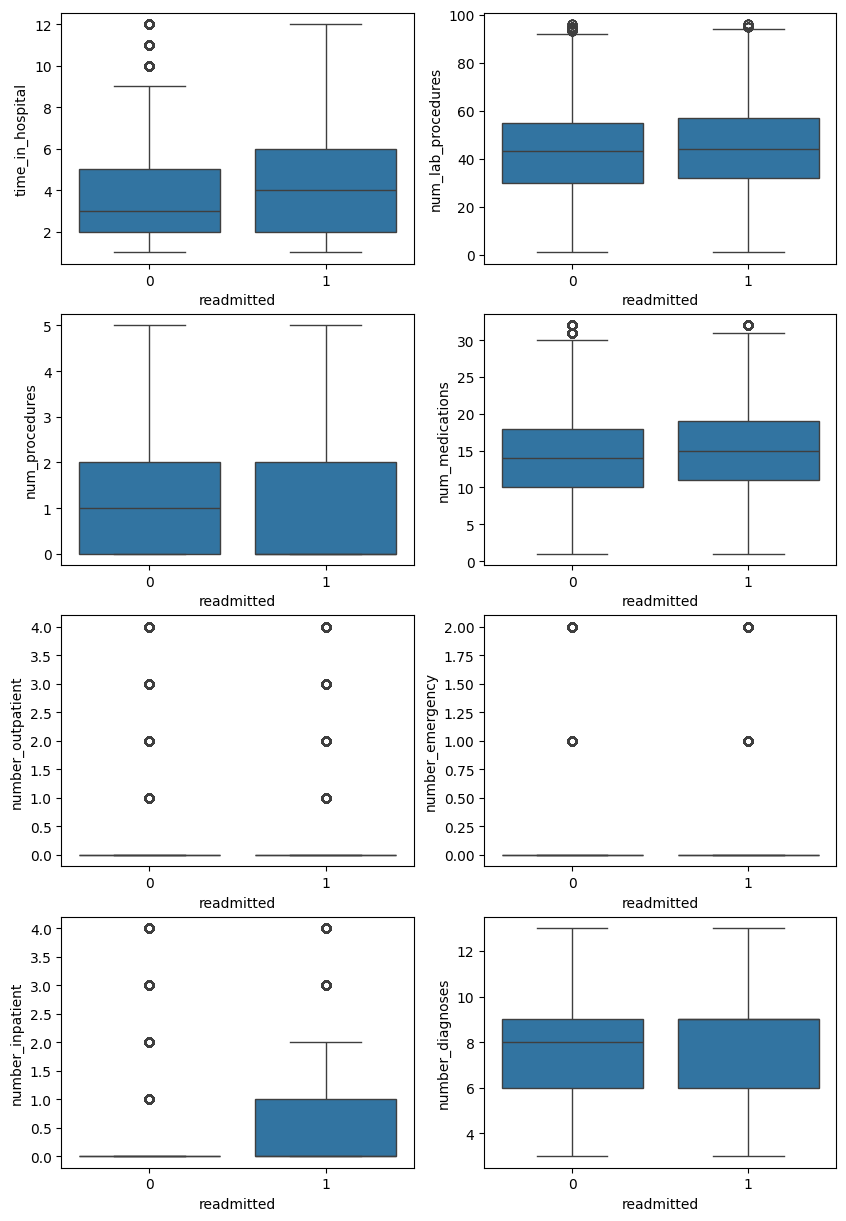

In [52]:
# Perform distribution box plot again to check if outliers are removed significantly are not
# Distribution of numerical variables against target variable
plt.figure(figsize=(10,15))

plt.subplot(4,2,1)
sns.boxplot(data=df, y='time_in_hospital', x='readmitted')
plt.subplot(4,2,2)
sns.boxplot(data=df, y='num_lab_procedures', x='readmitted')

plt.subplot(4,2,3)
sns.boxplot(data=df, y='num_procedures', x='readmitted')
plt.subplot(4,2,4)
sns.boxplot(data=df, y='num_medications', x='readmitted')

plt.subplot(4,2,5)
sns.boxplot(data=df, y='number_outpatient', x='readmitted')
plt.subplot(4,2,6)
sns.boxplot(data=df, y='number_emergency', x='readmitted')

plt.subplot(4,2,7)
sns.boxplot(data=df, y='number_inpatient', x='readmitted')
plt.subplot(4,2,8)
sns.boxplot(data=df, y='number_diagnoses', x='readmitted')

plt.show()

Conclusion:
* Although some outliers are still present in these attributes, they have been deliberately retained since a significant number of records are associated with these values.

# Check Multicollinearity

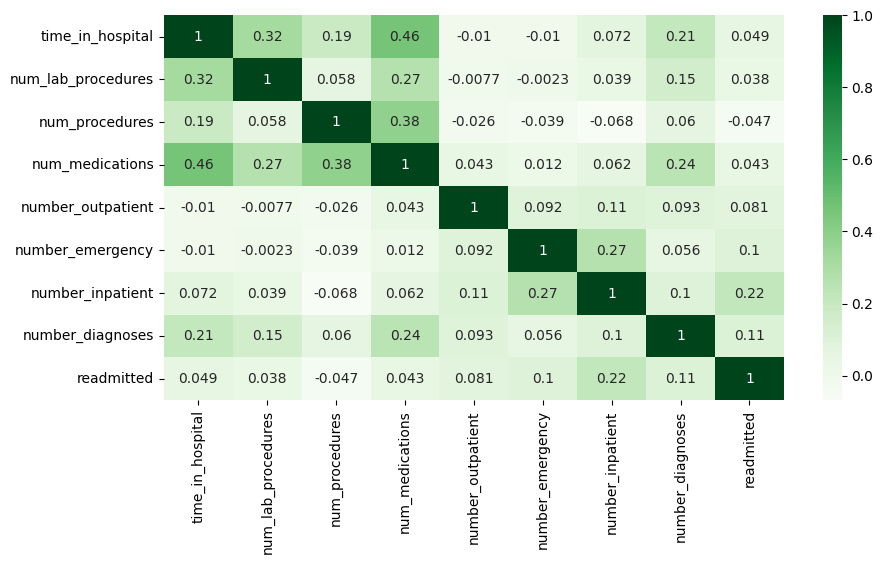

In [53]:
# Draw a heatmap correlation to understand the correlation between all these numerical variables against target variable readmitted.
plt.figure(figsize=(10,5))
sns.heatmap(data=df_int.corr(), cmap='Greens', annot=True)
plt.show()

Inference:
* The num_medications attribute has a strong correlation with time_in_hospital, num_lab_procedures, num_procedures, and number_diagnoses.
* While not highly correlated, number_inpatient shows the strongest correlation with the target variable (readmitted), followed by number_diagnoses.
* number_inpatient and number_outpatient exhibit some degree of correlation with each other.

Conclusion:
* The attributes time_in_hospital, num_lab_procedures, num_medications, number_inpatient, and number_diagnoses appear to be significant and should be carefully selected to avoid multicollinearity in the model.

# Feature Selection Conclusion:
* Multivariate analysis was conducted for each categorical (string) attribute against the readmitted variable, leading to the selection of the following significant columns:
['race', 'age', 'discharge_disposition_id', 'admission_source_id', 'insulin', 'diag_1', 'diag_2', 'diag_3']
* Box plot analysis was performed on numerical variables to analyze their distribution, remove most of the outliers, and ensure data consistency.
* A correlation matrix was examined to identify and mitigate multicollinearity, resulting in the selection of the following numerical attributes for the model:
['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses']

featured_columns = [
    'race', 'age', 'discharge_disposition_id', 'admission_source_id', 
    'insulin', 'diag_1', 'diag_2', 'diag_3', 
    'time_in_hospital', 'num_lab_procedures', 'num_medications', 
    'number_inpatient', 'number_diagnoses',
    'readmitted'
]

In [54]:
# selected featured columns after EDA:
featured_columns = [
    'race', 'age', 'discharge_disposition_id', 'admission_source_id', 'insulin', 'diag_1', 'diag_2', 'diag_3', # Categorical attributes
    'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', # Numerical attributes
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone', 
    'metformin_pioglitazone', 'change','diabetesMed', # Nominal attributes 
    'readmitted' # Target variable
]

print(f"Selected Featured Columns: \n{featured_columns}\n")
print(f"Actual Columns: \n{df.columns}\n")
print(f"Records size of the considered data: \n{df.shape[0]}")


Selected Featured Columns: 
['race', 'age', 'discharge_disposition_id', 'admission_source_id', 'insulin', 'diag_1', 'diag_2', 'diag_3', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone', 'metformin_pioglitazone', 'change', 'diabetesMed', 'readmitted']

Actual Columns: 
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnose

In [55]:
# Dataframe with featured columns
df = df[featured_columns]

print(f"Shape of the dataset: {df.shape}\n")
df.head()

Shape of the dataset: (86553, 37)



,race,age,discharge_disposition_id,admission_source_id,insulin,diag_1,diag_2,diag_3,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
1,Caucasian,[10-20),Home,Emergency,Up,276,250.01,255,3,59,18,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,1
2,AfricanAmerican,[20-30),Home,Emergency,No,648,250,V27,2,11,13,1,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,[30-40),Home,Emergency,Up,8,250.43,403,2,44,16,0,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,0
4,Caucasian,[40-50),Home,Emergency,Steady,197,157,250,1,51,8,0,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,0
6,Caucasian,[60-70),Home,Referral,Steady,414,411,V45,4,70,21,0,7,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,0


Inference:
* There are 86553 diabetes encounters and 37 feature attributes considered upon EDA analysis.

Conclusion:
* One Hot or Label encoding and Feature scaling will need to be performed for better final results.

# One-Hot Encoding for categorical variables

In [56]:
# Divide the columns into respective categories
df_cat = df.select_dtypes(include='object')
df_cat_cols = df_cat.columns
print(f"Categorical Columns: {len(df_cat_cols)} \n{df_cat_cols}")

df_num = df.select_dtypes(include='int')
df_num_cols = list(df_num.columns)
df_num_cols.remove('readmitted')
print(f"Numerical Columns: {len(df_num_cols)} \n{df_num_cols}")

Categorical Columns: 31 
Index(['race', 'age', 'discharge_disposition_id', 'admission_source_id',
       'insulin', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')
Numerical Columns: 5 
['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses']


Inference:
* The dataset contains 31 categorical and 6 numerical columns.
* All 31 categorical columns need to be encoded before modeling.
* One-Hot Encoding (OHE) is suitable for most categorical variables, except for diag_1, diag_2, and diag_3, as these are continuous-like categorical variables.

Conclusion:
* One-Hot Encoding (OHE) will be applied to all categorical variables, except for diag_1, diag_2, and diag_3.
* Target Encoding will be used for diag_1, diag_2, and diag_3 to maintain meaningful representation and improve model performance.

In [57]:
# One-Hot and Frequency encoding columns
ohe_cols = ['race', 'age', 'discharge_disposition_id', 'admission_source_id',
       'insulin', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone', 'change',
       'diabetesMed']

tgte_cols = ['diag_1', 'diag_2', 'diag_3']

In [58]:
# perform OHE on ohe_cols dataset
ohe_df = pd.get_dummies(data=df[ohe_cols], columns=ohe_cols, drop_first=True).astype(int)
ohe_df.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),discharge_disposition_id__Other,admission_source_id_Emergency,admission_source_id_Referral,insulin_Down,insulin_Steady,insulin_Up,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,glyburide_metformin_Down,glyburide_metformin_Steady,glyburide_metformin_Up,glipizide_metformin_Steady,glimepiride_pioglitazone_Steady,metformin_pioglitazone_Steady,change_Yes,diabetesMed_Yes
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [59]:
# Perform one hot encoding on tgte_cols dataset
tgte_df = df[tgte_cols]

tgte_df.head()

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
6,414,411,V45


In [60]:
# Categorize all diagnosis codes to respective description of ICD-9
icd9_categories = {
    (1, 139): 1, #"Infectious and Parasitic Diseases",
    (140, 239): 2, #"Neoplasms (Tumors, Cancer)",
    (240, 279): 3, #"Endocrine, Nutritional, and Metabolic Diseases, and Immunity Disorders",
    (280, 289): 4, #"Diseases of the Blood and Blood-Forming Organs",
    (290, 319): 5, #"Mental Disorders",
    (320, 389): 6, #"Diseases of the Nervous System and Sense Organs",
    (390, 459): 7, #"Diseases of the Circulatory System",
    (460, 519): 8, #"Diseases of the Respiratory System",
    (520, 579): 9, #"Diseases of the Digestive System",
    (580, 629): 10, #"Diseases of the Genitourinary System",
    (630, 679): 11, #"Complications of Pregnancy, Childbirth, and the Puerperium",
    (680, 709): 12, #"Diseases of the Skin and Subcutaneous Tissue",
    (710, 739): 13, #"Diseases of the Musculoskeletal System and Connective Tissue",
    (740, 759): 14, #"Congenital Anomalies",
    (760, 779): 15, #"Conditions Originating in the Perinatal Period",
    (780, 799): 16, #"Symptoms, Signs, and Ill-Defined Conditions",
    (800, 999): 17, #"Injury and Poisoning",
    "V": 18, #"Supplementary Classification of Factors Influencing Health Status and Contact with Health Services",
    "E": 19 #"External Causes of Injury"
}


In [61]:
# Function to map ICD-9 diagnosis code to its category.
def map_icd9_category(code):
    try:
        if isinstance(code, str) and code.startswith("V"):
            return icd9_categories["V"]
        elif isinstance(code, str) and code.startswith("E"):
            return icd9_categories["E"]
        else:
            code = float(code)  # Convert to float to handle decimal codes
            for (start, end), category in icd9_categories.items():
                if start <= code <= end:
                    return category
    except ValueError:
        return 0
    return 0

In [62]:
# apply mapping to all the 3 diagnosis attributes
tgte_df["diag_1"] = tgte_df["diag_1"].apply(map_icd9_category)
tgte_df["diag_2"] = tgte_df["diag_2"].apply(map_icd9_category)
tgte_df["diag_3"] = tgte_df["diag_3"].apply(map_icd9_category)

tgte_df.head()

/var/folders/v0/49kjpm5s6n78g9b56vldj2r80000gn/T/ipykernel_21574/3558630749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgte_df["diag_1"] = tgte_df["diag_1"].apply(map_icd9_category)
/var/folders/v0/49kjpm5s6n78g9b56vldj2r80000gn/T/ipykernel_21574/3558630749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgte_df["diag_2"] = tgte_df["diag_2"].apply(map_icd9_category)
/var/folders/v0/49kjpm5s6n78g9b56vldj2r80000gn/T/ipykernel_21574/3558630749.py:4: SettingWithCopyWarning: 
A value is trying to be

,diag_1,diag_2,diag_3
1,3,3,3
2,11,3,18
3,1,3,7
4,2,2,3
6,7,7,18


In [63]:
# Scaling for diag variables
scaler = MinMaxScaler()

df_tgte_final = scaler.fit_transform(tgte_df)
df_tgte_final = pd.DataFrame(df_tgte_final, columns=tgte_df.columns).reset_index().drop(columns=['index'])
df_tgte_final.head()

,diag_1,diag_2,diag_3
0,0.1578947,0.1111111,0.1111111
1,0.5789474,0.1111111,0.9444444
2,0.0526316,0.1111111,0.3333333
3,0.1052632,0.0555556,0.1111111
4,0.3684211,0.3333333,0.9444444


In [64]:
# Merge the OHE and Target encoded dataframes into one final df
df_cat_final = pd.concat(objs=[ohe_df,tgte_df], axis=1).reset_index().drop(columns=['index'])
df_cat_final.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),discharge_disposition_id__Other,admission_source_id_Emergency,admission_source_id_Referral,insulin_Down,insulin_Steady,insulin_Up,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,glyburide_metformin_Down,glyburide_metformin_Steady,glyburide_metformin_Up,glipizide_metformin_Steady,glimepiride_pioglitazone_Steady,metformin_pioglitazone_Steady,change_Yes,diabetesMed_Yes,diag_1,diag_2,diag_3
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,3,18
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,7
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7,7,18


In [65]:
# Scaling for numerical variables
scaler = MinMaxScaler()

df_num = df_num[df_num_cols]
df_num_final = scaler.fit_transform(df_num)
df_num_final = pd.DataFrame(df_num_final, columns=df_num_cols).reset_index().drop(columns=['index'])
df_num_final.head()

,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses
0,0.1818182,0.6105263,0.5483871,0.0000000,0.6000000
1,0.0909091,0.1052632,0.3870968,0.2500000,0.3000000
2,0.0909091,0.4526316,0.4838710,0.0000000,0.4000000
3,0.0000000,0.5263158,0.2258065,0.0000000,0.2000000
4,0.2727273,0.7263158,0.6451613,0.0000000,0.4000000


In [66]:
# Resetting the index of target variable
df_tgt = df['readmitted'].reset_index().drop(columns=['index'])
df_tgt.head()

,readmitted
0,1
1,0
2,0
3,0
4,0


In [67]:
# Create the final dataframe with encoded categorical and scaled numerical and final target variables
df_final = pd.concat([df_cat_final, df_num_final, df_tgt], axis=1)
df_final.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),discharge_disposition_id__Other,admission_source_id_Emergency,admission_source_id_Referral,insulin_Down,insulin_Steady,insulin_Up,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,glyburide_metformin_Down,glyburide_metformin_Steady,glyburide_metformin_Up,glipizide_metformin_Steady,glimepiride_pioglitazone_Steady,metformin_pioglitazone_Steady,change_Yes,diabetesMed_Yes,diag_1,diag_2,diag_3,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,readmitted
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,0.1818182,0.6105263,0.5483871,0.0000000,0.6000000,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,3,18,0.0909091,0.1052632,0.3870968,0.2500000,0.3000000,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,7,0.0909091,0.4526316,0.4838710,0.0000000,0.4000000,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,0.0000000,0.5263158,0.2258065,0.0000000,0.2000000,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7,7,18,0.2727273,0.7263158,0.6451613,0.0000000,0.4000000,0


In [68]:
# Validate the shape of initial and final dataframe
print(f'Shape of the initial dataframe: {df.shape}')
print(f'Shape of the final dataframe: {df_final.shape}')

Shape of the initial dataframe: (86553, 37)
Shape of the final dataframe: (86553, 74)


# Creating the Logistic Regression model

In [69]:
# Create X and y dataframes
y = df_final.pop('readmitted')
X = df_final

In [70]:
# Seggregate X and y to train test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (69242, 73)
Shape of X_test: (17311, 73)
Shape of y_train: (69242,)
Shape of y_test: (17311,)


In [71]:
# create a logistic regression model using statsmodel Generalized Linear Model (GLM)
X_train_sm = sm.add_constant(X_train)
logreg = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
model = logreg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                69242
Model:                            GLM   Df Residuals:                    69169
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45556.
Date:                Sun, 23 Mar 2025   Deviance:                       91112.
Time:                        13:42:57   Pearson chi2:                 6.93e+04
No. Iterations:                    21   Pseudo R-squ. (CS):            0.05946
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.3149      0.348     -6.650      0.000      -2.997      -1.633
race_AfricanAmerican                0.3874      0.059      6.607      0.000       0.272       0.502
race_Asian                          0.0402      0.115      0.350      0.726      -0.185       0.265
race_Caucasian                      0.4156      0.056      7.367      0.000       0.305       0.526
race_Hispanic                       0.2645      0.079      3.348      0.001       0.110       0.419
race_Other                          0.1787      0.087      2.062      0.039       0.009       0.349
age_[10-20)                         0.7529      0.360      2.093      0.036       0.048       1.458
age_[20-30)                         0.4892      0.349      1.403      0.161      -0.194       1.173
age_[30-40)                         0.5931      0.345      1.721      0.085      -0.082       1.269
age_[40-50)                         0.6275      0.343      1.828      0.067      -0.045       1.300
age_[50-60)                         0.6641      0.343      1.937      0.053      -0.008       1.336
age_[60-70)                         0.7657      0.343      2.234      0.025       0.094       1.437
age_[70-80)                         0.8306      0.343      2.424      0.015       0.159       1.502
age_[80-90)                         0.8198      0.343      2.391      0.017       0.148       1.492
age_[90-100)                        0.5111      0.345      1.480      0.139      -0.166       1.188
discharge_disposition_id__Other    -0.0563      0.018     -3.196      0.001      -0.091      -0.022
admission_source_id_Emergency       0.3147      0.025     12.345      0.000       0.265       0.365
admission_source_id_Referral        0.1724      0.027      6.384      0.000       0.119       0.225
insulin_Down                        0.0466      0.043      1.086      0.277      -0.037       0.131
insulin_Steady                     -0.1370      0.026     -5.220      0.000      -0.188      -0.086
insulin_Up                          0.0374      0.043      0.861      0.389      -0.048       0.123
metformin_Down                     -0.0471      0.104     -0.453      0.651      -0.251       0.157
metformin_Steady                   -0.1532      0.025     -6.084      0.000      -0.203      -0.104
metformin_Up                       -0.2404      0.081     -2.973      0.003      -0.399      -0.082
repaglinide_Down                   -0.3449      0.370     -0.932      0.351      -1.070       0.381
repaglinide_Steady                  0.1883      0.069      2.742      0.006       0.054       0.323
repaglinide_Up                     -0.3147      0.253     -1.244      0.214      -0.811       0.181
nateglinide_Down                   -0.8159      0.854     -0.956      0.339      -2

Inference:
* Below attributes are found to have high P values greater than 0.05
    
    "chlorpropamide_Down","acarbose_Down","tolazamide_Up","glimepiride_pioglitazone_Steady","metformin_pioglitazone_Steady","chlorpropamide_Up","miglitol_Down",\
    "glyburide_metformin_Up","miglitol_Up","num_lab_procedures","glipizide_Up","glimepiride_Steady","tolbutamide_Steady","nateglinide_Up","glyburide_Down",\
    "glyburide_Steady","race_Asian","glimepiride_Down","nateglinide_Steady","metformin_Down","change_Yes","pioglitazone_Down","miglitol_Steady","troglitazone_Steady",\
    "pioglitazone_Up","insulin_Up","repaglinide_Down","glyburide_metformin_Down","glipizide_metformin_Steady","nateglinide_Down","insulin_Down","glyburide_Up",\
    "acarbose_Up","chlorpropamide_Steady","pioglitazone_Steady","repaglinide_Up","age_[20-30)","age_[90-100)","tolazamide_Steady","glipizide_Steady","age_[30-40)",\
    "glyburide_metformin_Steady","rosiglitazone_Up","age_[40-50)","glipizide_Down","glimepiride_Up","rosiglitazone_Down"

Conclusion:
* Drop all above insignificant attributes and re-run the model again for better results

In [72]:
cols_to_drop = ["chlorpropamide_Down","acarbose_Down","tolazamide_Up","glimepiride_pioglitazone_Steady","metformin_pioglitazone_Steady","chlorpropamide_Up","miglitol_Down",\
                "glyburide_metformin_Up","miglitol_Up","num_lab_procedures","glipizide_Up","glimepiride_Steady","tolbutamide_Steady","nateglinide_Up","glyburide_Down",\
                "glyburide_Steady","race_Asian","glimepiride_Down","nateglinide_Steady","metformin_Down","change_Yes","pioglitazone_Down","miglitol_Steady","troglitazone_Steady",\
                "pioglitazone_Up","insulin_Up","repaglinide_Down","glyburide_metformin_Down","glipizide_metformin_Steady","nateglinide_Down","insulin_Down","glyburide_Up",\
                "acarbose_Up","chlorpropamide_Steady","pioglitazone_Steady","repaglinide_Up","age_[20-30)","age_[90-100)","tolazamide_Steady","glipizide_Steady","age_[30-40)",\
                "glyburide_metformin_Steady","rosiglitazone_Up","age_[40-50)","glipizide_Down","glimepiride_Up","rosiglitazone_Down"]

X_train.drop(columns=cols_to_drop, axis=1, inplace=True)

# Add constant to X_train
X_train_sm = sm.add_constant(X_train)

# create a logistic regression model using statsmodel Generalized Linear Model (GLM)
X_train_sm = sm.add_constant(X_train)
logreg = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
model = logreg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                69242
Model:                            GLM   Df Residuals:                    69215
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45591.
Date:                Sun, 23 Mar 2025   Deviance:                       91182.
Time:                        13:42:57   Pearson chi2:                 6.94e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05850
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.7318      0.063    -27.340      0.000      -1.856      -1.608
race_AfricanAmerican                0.3822      0.052      7.361      0.000       0.280       0.484
race_Caucasian                      0.4073      0.049      8.242      0.000       0.310       0.504
race_Hispanic                       0.2639      0.074      3.562      0.000       0.119       0.409
race_Other                          0.1780      0.082      2.166      0.030       0.017       0.339
age_[10-20)                         0.1652      0.115      1.439      0.150      -0.060       0.390
age_[50-60)                         0.0748      0.027      2.727      0.006       0.021       0.129
age_[60-70)                         0.1764      0.026      6.836      0.000       0.126       0.227
age_[70-80)                         0.2418      0.025      9.683      0.000       0.193       0.291
age_[80-90)                         0.2313      0.028      8.384      0.000       0.177       0.285
discharge_disposition_id__Other    -0.0615      0.017     -3.546      0.000      -0.095      -0.027
admission_source_id_Emergency       0.3201      0.025     12.801      0.000       0.271       0.369
admission_source_id_Referral        0.1768      0.027      6.565      0.000       0.124       0.230
insulin_Steady                     -0.1641      0.019     -8.839      0.000      -0.200      -0.128
metformin_Steady                   -0.1569      0.021     -7.304      0.000      -0.199      -0.115
metformin_Up                       -0.2498      0.079     -3.156      0.002      -0.405      -0.095
repaglinide_Steady                  0.1799      0.068      2.657      0.008       0.047       0.313
rosiglitazone_Steady                0.1252      0.033      3.753      0.000       0.060       0.191
acarbose_Steady                     0.3370      0.152      2.216      0.027       0.039       0.635
diabetesMed_Yes                     0.3443      0.022     16.008      0.000       0.302       0.386
diag_1                             -0.0068      0.002     -3.822      0.000      -0.010      -0.003
diag_2                             -0.0066      0.002     -3.389      0.001      -0.010      -0.003
diag_3                              0.0039      0.002      2.205      0.027       0.000       0.007
time_in_hospital                    0.1423      0.038      3.770      0.000       0.068       0.216
num_medications                     0.2618      0.045      5.868      0.000       0.174       0.349
number_inpatient                    1.7535      0.039     45.483      0.000       1.678       1.829
number_diagnoses                    0.6658      0.047     14.244      0.000       0.574       0.757
===================================================================================

Inference:
* Below attribute is found to have high P values greater than 0.05
    
    "age_[10-20)"

Conclusion:
* Drop above insignificant attribute and re-run the model again for better results

In [73]:
cols_to_drop = ["age_[10-20)"]

X_train.drop(columns=cols_to_drop, axis=1, inplace=True)

# Add constant to X_train
X_train_sm = sm.add_constant(X_train)

# create a logistic regression model using statsmodel Generalized Linear Model (GLM)
X_train_sm = sm.add_constant(X_train)
logreg = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
model = logreg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                69242
Model:                            GLM   Df Residuals:                    69216
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45592.
Date:                Sun, 23 Mar 2025   Deviance:                       91184.
Time:                        13:42:57   Pearson chi2:                 6.94e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05847
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.7259      0.063    -27.308      0.000      -1.850      -1.602
race_AfricanAmerican                0.3832      0.052      7.382      0.000       0.281       0.485
race_Caucasian                      0.4084      0.049      8.264      0.000       0.312       0.505
race_Hispanic                       0.2649      0.074      3.577      0.000       0.120       0.410
race_Other                          0.1789      0.082      2.177      0.029       0.018       0.340
age_[50-60)                         0.0706      0.027      2.588      0.010       0.017       0.124
age_[60-70)                         0.1723      0.026      6.720      0.000       0.122       0.223
age_[70-80)                         0.2377      0.025      9.584      0.000       0.189       0.286
age_[80-90)                         0.2273      0.027      8.282      0.000       0.174       0.281
discharge_disposition_id__Other    -0.0618      0.017     -3.565      0.000      -0.096      -0.028
admission_source_id_Emergency       0.3208      0.025     12.830      0.000       0.272       0.370
admission_source_id_Referral        0.1772      0.027      6.579      0.000       0.124       0.230
insulin_Steady                     -0.1638      0.019     -8.825      0.000      -0.200      -0.127
metformin_Steady                   -0.1578      0.021     -7.345      0.000      -0.200      -0.116
metformin_Up                       -0.2502      0.079     -3.161      0.002      -0.405      -0.095
repaglinide_Steady                  0.1795      0.068      2.652      0.008       0.047       0.312
rosiglitazone_Steady                0.1246      0.033      3.735      0.000       0.059       0.190
acarbose_Steady                     0.3366      0.152      2.214      0.027       0.039       0.635
diabetesMed_Yes                     0.3451      0.022     16.049      0.000       0.303       0.387
diag_1                             -0.0069      0.002     -3.881      0.000      -0.010      -0.003
diag_2                             -0.0066      0.002     -3.405      0.001      -0.010      -0.003
diag_3                              0.0040      0.002      2.245      0.025       0.001       0.007
time_in_hospital                    0.1429      0.038      3.788      0.000       0.069       0.217
num_medications                     0.2595      0.045      5.821      0.000       0.172       0.347
number_inpatient                    1.7536      0.039     45.485      0.000       1.678       1.829
number_diagnoses                    0.6610      0.047     14.179      0.000       0.570       0.752
===================================================================================================
"""

In [74]:
# Calculate Variation Inflation Factor (VIF) for above variables
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,feature,VIF
1,race_Caucasian,13.1538221
24,number_diagnoses,7.8581884
22,num_medications,7.6145841
17,diabetesMed_Yes,5.4745489
9,admission_source_id_Emergency,5.2365022
18,diag_1,4.5633073
19,diag_2,4.2004079
0,race_AfricanAmerican,3.9149010
20,diag_3,3.6288267
10,admission_source_id_Referral,3.1156199


Inference:
* There are no variables now that are insignificant.

Conclusion:
* As there are no insignificant variables, with this dataset prediction can be done and validate the metrics.

In [75]:
# Validate the accuracy of the model against train dataset
y_train_pred = model.predict(X_train_sm)
y_train_pred = y_train_pred.apply(lambda x: 1 if x > 0.5 else 0)
print(f"Accuracy against Train dataset: {accuracy_score(y_train.values, y_train_pred.values)}")

Accuracy against Train dataset: 0.6100488143034575


Inference:
* Model is 61% accurate in predicting the train dataset.

Conclusion:
* Predict the same against test dataset.

In [76]:
# Add constant to X_test dataset
X_test_sm = sm.add_constant(X_test[X_train.columns])

# Predict the test dataset
y_test_pred = model.predict(X_test_sm)
y_test_pred = y_test_pred.apply(lambda x: 1 if x > 0.5 else 0)
print(f"Accuracy against Test dataset: {accuracy_score(y_test.values, y_test_pred.values)}")

Accuracy against Test dataset: 0.6092657847611346


Inference:
* Model is 61% accurate in predicting the test dataset.

Conclusion:
* Find the confusion matrix and other metrics

# Metrics Evaluation

In [77]:
print(f"Confusion Matrix of the model predictions: \n{confusion_matrix(y_true=y_test, y_pred=y_test_pred)}")

Confusion Matrix of the model predictions: 
[[7537 1920]
 [4844 3010]]


In [78]:
print(f"Precision of the model: {precision_score(y_true=y_test, y_pred=y_test_pred)}")
print(f"Recall of the model: {recall_score(y_true=y_test, y_pred=y_test_pred)}")
print(f"F1-Score of the model: {f1_score(y_true=y_test, y_pred=y_test_pred)}")

Precision of the model: 0.6105476673427992
Recall of the model: 0.38324420677361853
F1-Score of the model: 0.47090112640801


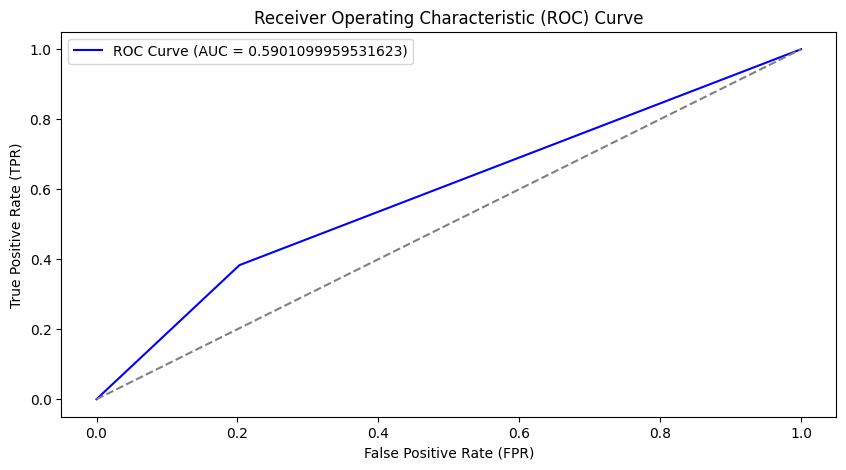

In [79]:
# ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_test_pred, drop_intermediate=False)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_test_pred)})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

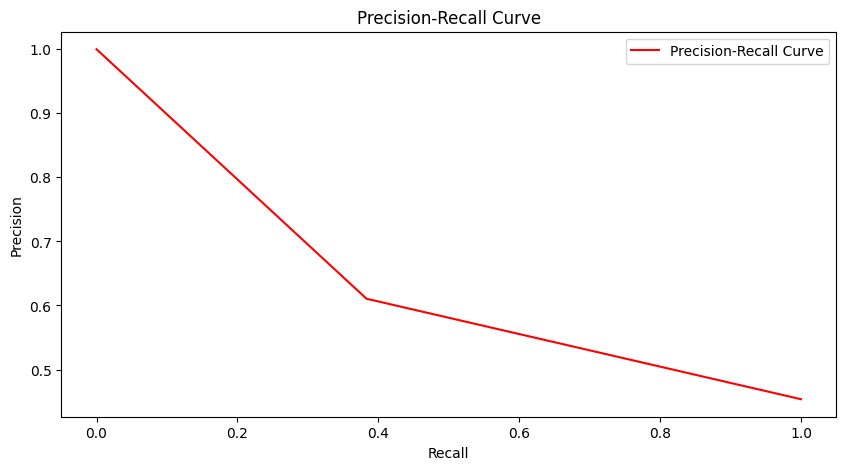

In [80]:
# compute precision, recalls
precisions, recalls, _ = precision_recall_curve(y_test, y_test_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.plot(recalls, precisions, label="Precision-Recall Curve", color="red")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Conclusion:
* Accuracy: Model is 61% accuracte in predicting the correctly classified cases.
* Precision: Model is 61% accurate in predicting the positives that are actually positive.
* Recall: Model is 38% captures 38% of the actual positive cases.
* F1-Score: Model balances between precision and recall well by 47%.
* AUC Score: Model differentiates between positive and negative cases by 59%.